# STEP 1: Business Probelm Understanding

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# STEP 2: Data Understanding

In [4]:
#2.1 Data Collection

In [70]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#If someone want to spend a total of $2000, what would be expected sales be

In [8]:
df['total_spend'] = df['TV'] + df['Radio']+df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [9]:
df.drop(columns=['TV','Radio','Newspaper'],inplace=True)
df.head()

,Sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,12.0,132.4
3,16.5,251.3
4,17.9,250.0


# STEP 3.Data Preprocessing

In [11]:
#3.1 EDA Exploratory Data Analysis

In [12]:
df.describe()

,Sales,total_spend
count,200.000000,200.000000
mean,15.130500,200.860500
std,5.283892,92.985181
min,1.600000,11.700000
25%,11.000000,123.550000
50%,16.000000,207.350000
75%,19.050000,281.125000
max,27.000000,433.600000


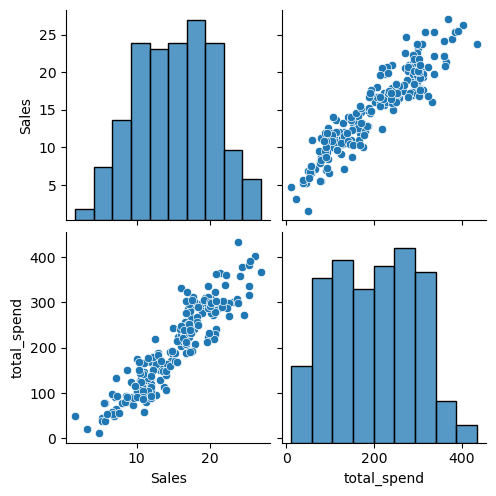

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.corr()

,Sales,total_spend
Sales,1.000000,0.924917
total_spend,0.924917,1.000000


In [15]:
#3.2 Data Claening

df.isnull().sum()

Sales          0
total_spend    0
dtype: int64

In [16]:
#3.3 Data Wrangling
#No encoding is require

In [17]:
# 3.4 : Train-Test Split


In [18]:
#creat X and Y
#Taking only one variable for now

X=df.drop(columns='Sales')
y=df['Sales']


In [19]:
import sklearn

In [20]:
pip install --upgrade scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# STEP 4.Modelling

In [25]:
#Modelling with default parameters

In [26]:
#import
from sklearn.linear_model import LinearRegression

In [27]:
#Save the model
model=LinearRegression()

In [28]:
#fit
model.fit(X_train,y_train)

LinearRegression()

In [29]:
#Print intercept(b0)
model.intercept_

4.7653139202885395

In [30]:
#print coef(b1)
model.coef_

array([0.05253329])

In [31]:
#Predictions

In [32]:
train_predictions=model.predict(X_train)

In [33]:
test_predictions=model.predict(X_test)

# STEP 5.Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data: ",mean_absolute_error(y_test,test_predictions))
print("MAE for train data: ",mean_absolute_error(y_train,train_predictions))

MAE for test data:  1.6665935124129527
MAE for train data:  1.5242208933379047


In [36]:
from sklearn.metrics import mean_squared_error
print("MSE for test data: ",mean_squared_error(y_test,test_predictions))
print("MSE for train data: ",mean_squared_error(y_train,train_predictions))

MAE for test data:  4.751599394081775
MAE for train data:  3.7042040794944557


In [37]:
print("RMSE for test data: ",np.sqrt(mean_squared_error(y_test,test_predictions)))
print("RMSE for train data: ",np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data:  2.1798163670552104
RMSE for train data:  1.9246308943520718


In [40]:
from sklearn.metrics import r2_score
print("R2 for test data: ",r2_score(y_test,test_predictions))
print("R2 for train data: ",r2_score(y_train,train_predictions))

R2 for test data:  0.8309969955285723
R2 for train data:  0.8578526798828715


In [41]:
#Test R-Square
model.score(X_test,y_test)

0.8309969955285723

In [42]:
#Train R-Square
model.score(X_train,y_train)

0.8578526798828715

# checkList

In [43]:
#checkList
#Check the model overfitting or underfitting problem
#Test Accuracy=Cross Validation Scorez


In [47]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)

cv_score = scores.mean()
print("Cross Validation Score: ",cv_score)

[0.84995313 0.89982582 0.87434003 0.78708779 0.83491392]
Cross Validation Score:  0.8492241389757677


In [48]:
#Check for Assumptions

In [49]:
#1.Linearity of Error

In [50]:
test_res=y_test-test_predictions

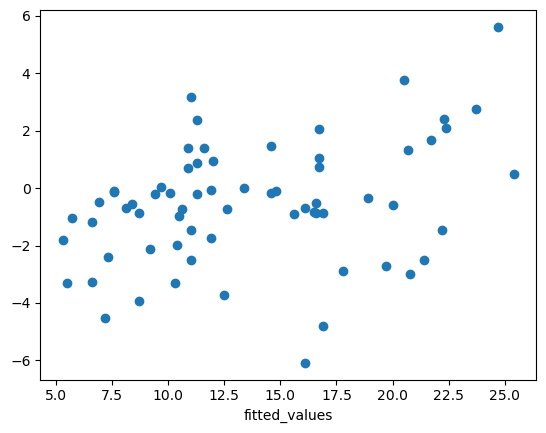

In [51]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.xlabel("fitted_values")
plt.show()


In [52]:
#Normality of Error

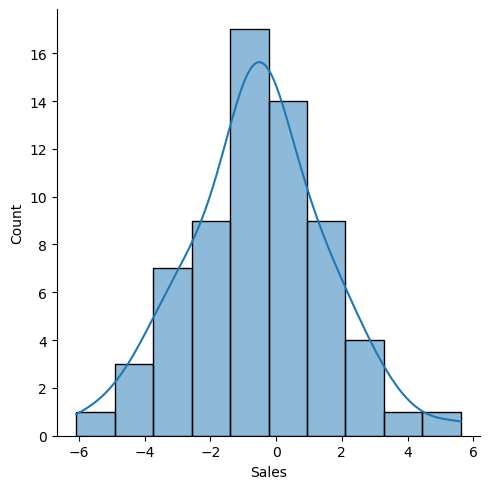

In [53]:
sns.displot(test_res,kde=True)

#plt.hist(test_res)
plt.show()

In [54]:
#Equal Variance of Error(Homoscadesicity)


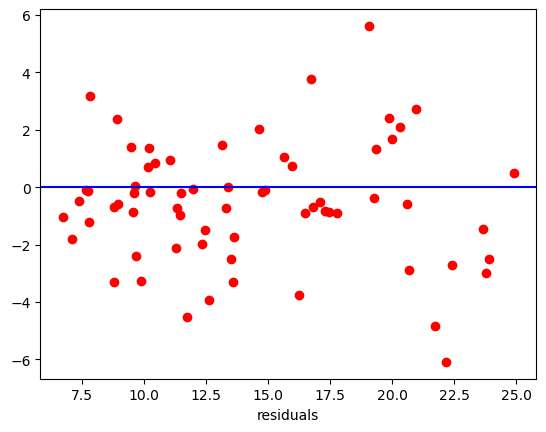

In [55]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.xlabel("residuals")
plt.show()


In [56]:
#Variable significance

In [58]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.19e-85
Time:                        17:32:40   Log-Likelihood:                -422.79
No. Observations:                 200   AIC:                             849.6
Df Residuals:                     198   BIC:                             856.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5736      0.340     13.465      0.000       3.904       5.243
X              0.0526      0.002     34.234      0.000       0.050       0.056
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.117
Skew:                           0.001   Prob(JB):                        0.943
Kurtosis:                       3.119   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# STEP 6: Final Inferences

In [60]:
model.predict([[321400]])

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16888.96395708])

# Save a Model

In [62]:
from joblib import dump

In [63]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

# Load a Model

In [65]:
from joblib import load

In [67]:
loaded_model=load('sales_model.joblib')

In [72]:
loaded_model.predict([[2000]])

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109.83188917])

# MLR CODE (Multiple Linear Regression) Model

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Collection

In [91]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [94]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA Exploratory Data Analysis

In [96]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


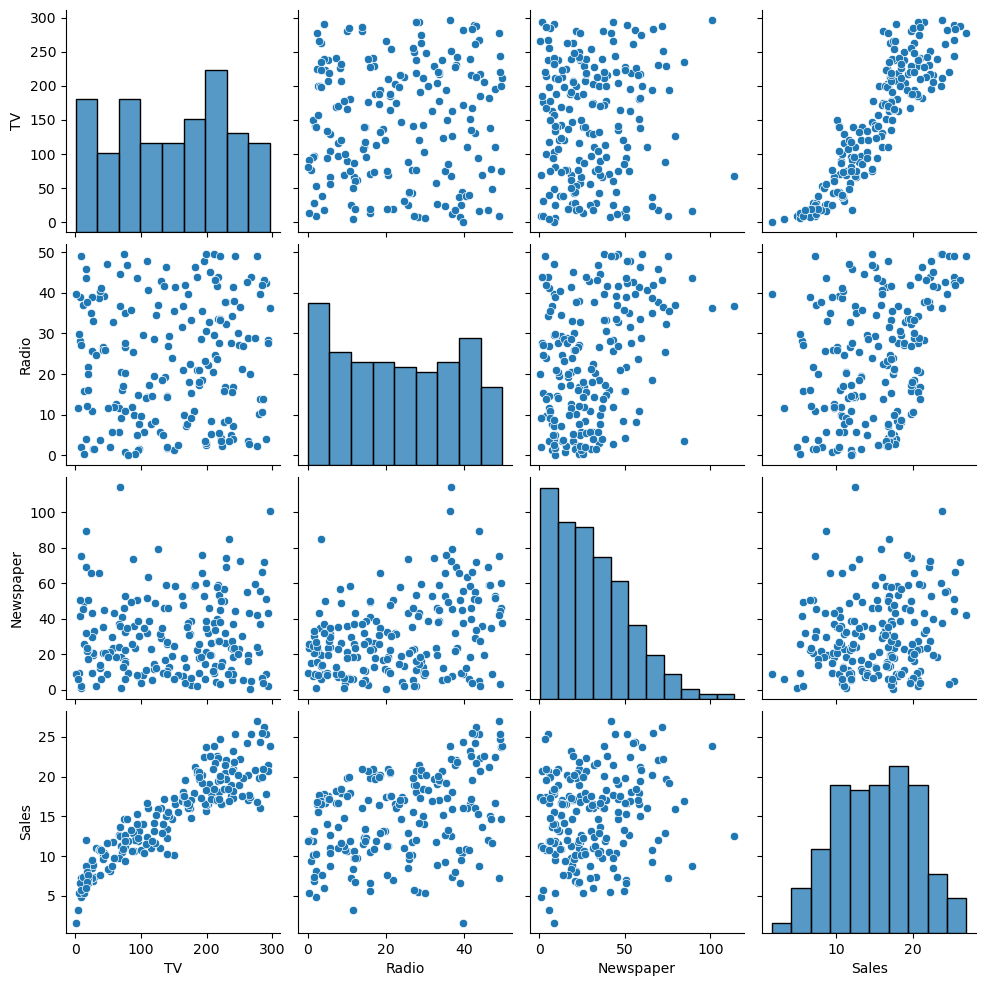

In [110]:
sns.pairplot(df)
plt.show()

In [98]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [99]:
#3.1 Data Cleaning

In [100]:
#3.2 Data Wrangling

In [103]:
#Train-Test Split

In [111]:
x=df.drop(columns='Sales')
y=df['Sales']


In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Step 4 :Modelling

In [113]:
from sklearn.linear_model import LinearRegression #import

model=LinearRegression() #instantiate

model.fit(X_train,y_train) #fit

LinearRegression()

In [114]:
model.intercept_

4.7653139202885395

In [115]:
model.coef_

array([0.05253329])

In [116]:
#Predictions

In [118]:
train_predictions=model.predict(X_train)

In [119]:
test_predictions=model.predict(X_test)

# Step 5: Evaluation Metrics

In [121]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))
train_RMSE=np.sqrt(mean_squared_error(y_train,train_predictions))
print(train_RMSE,test_RMSE)

1.9246308943520718 2.1798163670552104


In [123]:
model.score(X_train,y_train) #Train R2

0.8578526798828715

In [125]:
model.score(X_test,y_test) #Test R2

0.8309969955285723

# checkList
#Check the model overfitting or underfitting problem
#Test Accuracy=Cross Validation Scorez


In [127]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)
scores.mean()

[0.84995313 0.89982582 0.87434003 0.78708779 0.83491392]


0.8492241389757677

In [128]:
#ChecK for Assumptions

In [129]:
#1.Linearity of Error

In [132]:
test_res=y_test-test_predictions

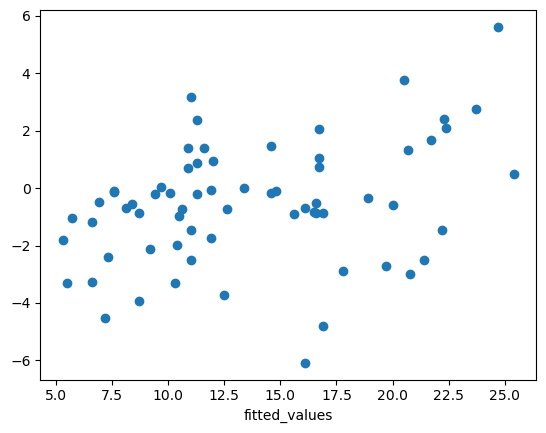

In [131]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.xlabel("fitted_values")
plt.show()

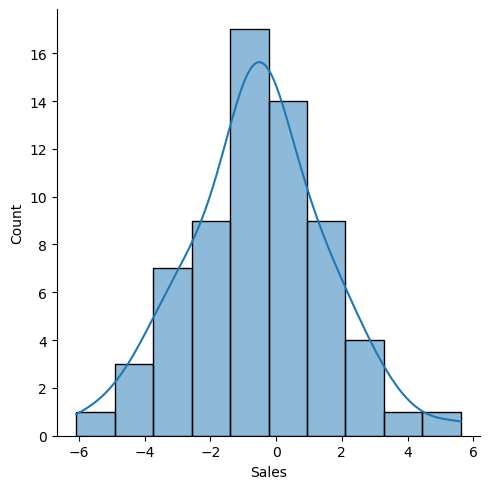

In [133]:
#Normality of Error
sns.displot(test_res,kde=True)

#plt.hist(test_res)
plt.show()

In [134]:
#Equal Variance of Error(Homoscadesicity)

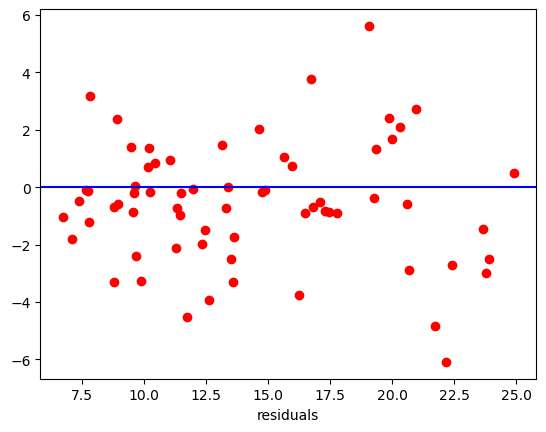

In [135]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.xlabel("residuals")
plt.show()

In [136]:
#Variable significance

In [137]:
import statsmodels.formula.api as smf
model1=smf.ols("y~X",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.19e-85
Time:                        19:10:03   Log-Likelihood:                -422.79
No. Observations:                 200   AIC:                             849.6
Df Residuals:                     198   BIC:                             856.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5736      0.340     13.465      0.000       3.904       5.243
X              0.0526      0.002     34.234      0.000       0.050       0.056
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.117
Skew:                           0.001   Prob(JB):                        0.943
Kurtosis:                       3.119   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

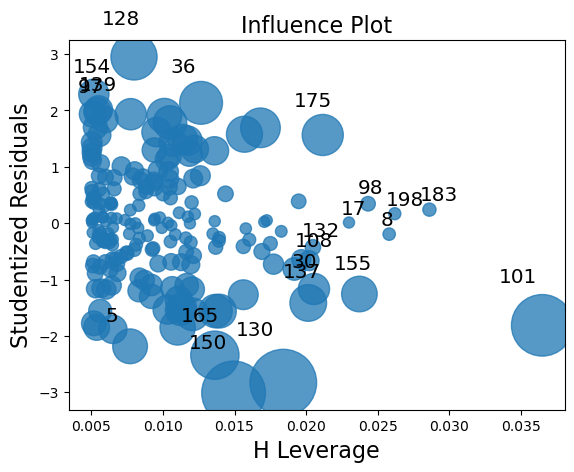

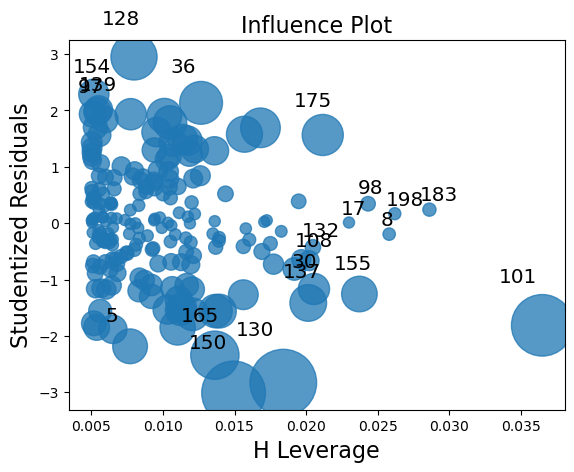

In [139]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [142]:
df.iloc[150]

TV           280.7
Radio         13.9
Newspaper     37.0
Sales         16.1
Name: 150, dtype: float64

In [143]:
df_new=df.drop(df.index[[130]],axis=0)
df_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [145]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.87e-101
Time:                        19:18:21   Log-Likelihood:                -371.18
No. Observations:                 199   AIC:                             750.4
Df Residuals:                     195   BIC:                             763.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7527      0.293     16.202      0.000       4.174       5.331
TV             0.0537      0.001     40.789      0.000       0.051       0.056
Radio          0.1114      0.008     13.727      0.000       0.095       0.127
Newspaper     -0.0023      0.006     -0.420      0.675      -0.013       0.009
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.467
Skew:                          -0.036   Prob(JB):                        0.792
Kurtosis:                       3.226   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#Variance Inflation Factor

In [155]:
#Calculating VIF's values of independent variables
rsq_TV=smf.ols('TV~Radio+Newspaper',data=df).fit()
rsq_TV.summary()

#Calculating VIF'S values of independent variables
rsq_TV=smf.ols('TV~Radio+Newspaper',data=df).fit().rsquared
vif_TV=1/(1-rsq_TV)

rsq_Radio=smf.ols('Radio~TV+Newspaper',data=df).fit().rsquared
vif_Radio=1/(1-rsq_Radio)

rsq_Newspaper=smf.ols('Newspaper~Radio+TV',data=df).fit().rsquared
vif_Newspaper=1/(1-rsq_Newspaper)

In [156]:
#Storing VIF Values in a data frame

In [158]:
d1={'Variables':['TV','Radio','Newspaper'],'VIF':[vif_TV,vif_Radio,vif_Newspaper]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,TV,1.004611
1,Radio,1.144952
2,Newspaper,1.145187


In [159]:
#If VIF>4 drop that independent variable

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


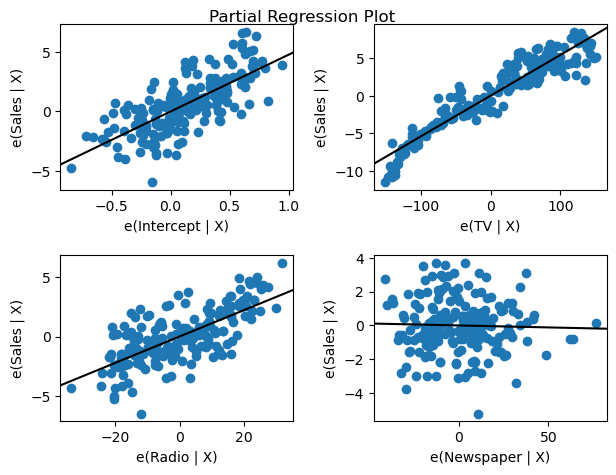

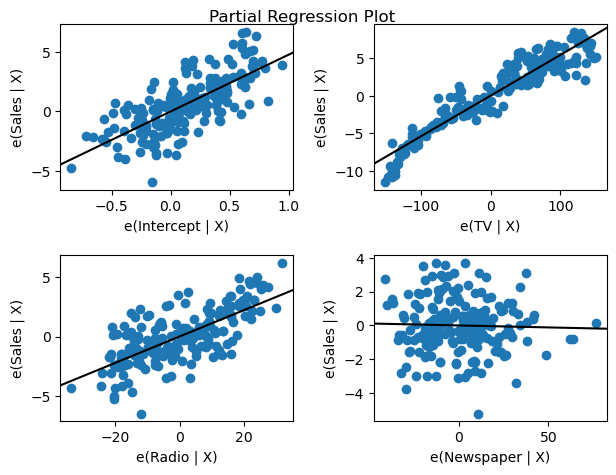

In [161]:
sm.graphics.plot_partregress_grid(lm)

# Final Model including TV & Radio only

In [162]:
final_model=smf.ols(formula='Sales~TV+Radio',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          2.39e-100
Time:                        19:39:39   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression PR

In [225]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [224]:
df=pd.read_csv("Advertising.csv")

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [168]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


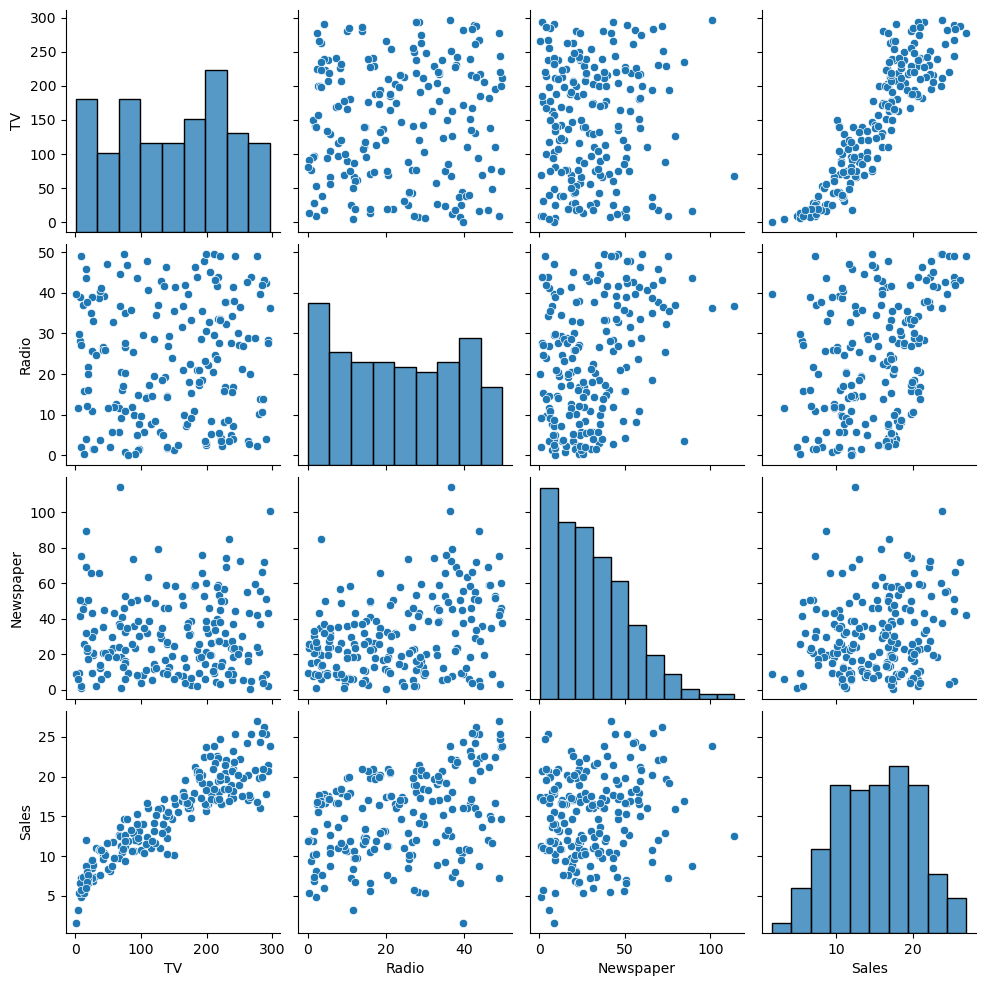

In [169]:
sns.pairplot(df)
plt.show()

In [170]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [172]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

X_poly=polynomial_converter.fit_transform(X)

X_poly=pd.DataFrame(X_poly)

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=45)

# Model Fitting on Polynomial Data

In [175]:
from sklearn.linear_model import LinearRegression #import

model=LinearRegression() #instantiate

model.fit(X_train,y_train) #fit

LinearRegression()

In [176]:
model.intercept_

2.5796461989080406

In [178]:
model.coef_

array([ 7.76232496e-02, -6.27856832e-05])

In [179]:
#Predictions

In [180]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [182]:
#Evaluation

In [183]:
model.score(X_train,y_train)#Train R2

0.862981635798128

In [184]:
model.score(X_test,y_test)#Test R2

0.8413527182408048

In [ ]:
#Evaluation

In [185]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_poly,y,cv=5)
print(scores)
scores.mean()

[0.84369182 0.89241643 0.89097789 0.79842414 0.83916571]


0.8529351996367961

In [186]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(y_test,test_pred))
train_RMSE=np.sqrt(mean_squared_error(y_train,train_pred))
print(train_RMSE,test_RMSE)

1.9976283248404627 1.9339831410295096


In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

x_poly=polynomial_converter.fit_transform(X)

x_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=45)

model=LinearRegression()
model.fit(X_train,y_train)

train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

print(model.score(X_train,y_train)) #Train r2
print(model.score(X_test,y_test)) #Test r2


0.862981635798128
0.8413527182408048


In [190]:
#Choosing a Model

In [191]:
#Bias-Variance Tradeoff

In [194]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    x_poly=polynomial_converter.fit_transform(X)
    
    x_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=45)
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_RMSE=np.sqrt(mean_squared_error(y_train,train_pred))
    train_rmse_errors.append(train_RMSE)
    
    test_RMSE=np.sqrt(mean_squared_error(y_test,test_pred))
    test_rmse_errors.append(test_RMSE)
    

In [195]:
train_rmse_errors

[1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627,
 1.9976283248404627]

In [203]:
test_rmse_errors

[1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096,
 1.9339831410295096]

In [204]:
#plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
#plt.plot(range(1,10),test_rmse_errors,label='TEST')
#plt.xlabel("Polynomial Complexity")
#plt.ylabel("RMSE")
#plt.legend()
#plt.show()

In [200]:
#plt.plot(range(1,5),train_rmse_errors[:4],label='TRAIN')
#plt.plot(range(1,5),test_rmse_errors[:4],label='TEST')
#plt.xlabel("Polynomial Complexity")
#plt.ylabel("RMSE")
#plt.legend()


In [201]:
#Finalizing the Model

In [223]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False
                                       )
x_poly=final_poly_converter.fit_transform(X)

x_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=45)

final_model=LinearRegression()
final_model.fit(X_train,y_train)

train_pred=final_model.predict(X_train)
test_pred=final_model.predict(X_test)

print("Train R2:",final_model.score(X_train,y_train)) #Train r2
print("Test R2:",final_model.score(X_test,y_test)) #Test r2

Train R2: 0.862981635798128
Test R2: 0.8413527182408048
